# Sarim Faheem

## Research question/interests

How likely is it for a certain matchday (gameweek) or time to be a predictor of a rowdy crowd? 

We wanted to look at how psycological influences affect fan/spectator behavior during NFL games. One such influence is 'groupthink' where individuals may behave disorderly if they see the larger group behave as such. Using matchday time and week data can correlate late games or holiday/vacational/weekend games with a rowdier crowd and in turn prove our hypothesis.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rawarrest = pd.read_csv("..\\data\\raw\\arrests.csv", sep= ",")
rawarrest

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y


## Milestone 3
---
## An Exploratory Data Analysis (EDA) on your dataset

Let's start with a quick output of the dataframe head and tail to get an idea of what the data looks like (first/last 5 lines)

In [23]:
rawarrest.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [24]:
rawarrest.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y
1005,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n


Get the columns of the raw data and the number of columns to see how extensive the list is

In [25]:
rawDfColumns = list(rawarrest.columns)
print(f"Columns: {rawDfColumns}")
print(f"Column count: {len(rawDfColumns)}")

Columns: ['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests', 'division_game']
Column count: 11


The following datasets on NFL arrrests has 11 columns that consists of the following categories:
1. Season = The year of the corresponding season from which data entry was recorded.
2. Week Number = The week or gameday week during which the fixture for data entry took place.
3. Day of week = The day of the week when the game of data entry took place. 
4. Gametime Local = Local timezone reflected time for scheduled game.
5. Home team = Corresponding home team from matchday.
6. Away team = Corresponding away team from matchday.
7. Home score = Corresponding home score for matchday.
8. Away score = Corresponding away score for matchday.
9. OT Flag = Data variable to confirm if the game went into overtime for corresponding data entry.
10. Arrests = Number of arrests recorded during matchday. 
11. Division game = Data variable to confirm if the game was an inter-divisional game (higher signficance/rivalry).

For this corresponding research question, the data aims to address the influence of time and data in relation to arrests made in stadium. To do this the data needs to be reformatted to include only the following variables:

- Season (For referencing)
- Week Number
- Day of Week
- Gametime local
- Arrests

But first let's obtain some more info about the values within our data.

In [26]:
rawarrest.describe()

,season,week_num,home_score,away_score,arrests
count,1006.000000,1006.000000,1006.000000,1006.000000,966.000000
mean,2013.000000,9.116302,23.934394,21.115308,6.566253
std,1.406453,5.008986,10.442626,9.734006,9.512101
min,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.000000,17.000000,14.000000,1.000000
50%,2013.000000,9.000000,23.000000,20.000000,3.000000
75%,2014.000000,14.000000,30.000000,27.000000,8.000000
max,2015.000000,17.000000,59.000000,56.000000,69.000000


We can now see totals for the categorical variables within the dataset.

Of note here is that the max value for arrests in a game was 69! 
Let's also do a quick check of what unique variables are present in some of the notable categories.

In [27]:
rawarrest.season.unique() #Season

array([2011, 2012, 2013, 2014, 2015], dtype=int64)

In [28]:
rawarrest.arrests.unique() #Arrests

array([ 5.,  6.,  9.,  3.,  4.,  1.,  0., 12.,  7.,  2., 10.,  8., 15.,
       13., 11., nan, 21., 18., 16., 14., 19., 23., 26., 35., 31., 39.,
       20., 29., 46., 22., 24., 33., 28., 34., 30., 38., 17., 27., 25.,
       44., 32., 49., 52., 37., 56., 69., 41., 47., 45., 40., 60., 36.])

The following array showcases that at one point there were no arrests within the dataset and one variable includes 'Nan' values. An important factor to recall when building our analysis. 

In [29]:
rawarrest.home_score.unique()

array([28, 27, 20, 19, 21, 23, 24,  3, 17, 38, 13, 25, 22, 40, 30, 18, 31,
       14,  6, 47, 26, 34, 35, 29, 16,  7, 33, 48, 12,  9, 10, 37, 39, 41,
       45, 15,  8, 49, 42, 36, 44, 52, 51, 32, 46, 55, 53, 43,  2, 59,  0,
       54, 58, 11], dtype=int64)

In [30]:
rawarrest.away_score.unique()

array([21, 31, 32, 13, 19, 17, 20, 16,  6, 24, 10, 28, 34, 11, 23, 14, 35,
        7, 18,  8, 36, 27,  3, 26, 41, 12, 33, 22, 30,  0, 15, 37, 29, 38,
        9, 42, 51, 39, 45, 25, 44, 40, 49, 43, 56, 48], dtype=int64)

Everything looks good for the scores! There are integer values present and include data variables for 0 pt games etc.

In [31]:
rawarrest.day_of_week.unique()

array(['Sunday', 'Monday', 'Thursday', 'Saturday', 'Wednesday'],
      dtype=object)

In [32]:
rawarrest.OT_flag.unique()

array([nan, 'OT'], dtype=object)

The authors seemed to define overtime games as variables of 'OT' representing an overtime game or 'NaN' representing a game concluding within the regular interval. Another important detail to note is that the weeks only correspond to 5 days and exclude Fridays and Tuesdays. This is due to Sports Broadcasting Act of 1961 which attributes highschool and college football games to Fridays and (occasionally) Saturdays respectively and does not permit the scheduling of any NFL games on these days unless required and not causing scheduling conflict. Tuesday games are just rarely scheduled in NFL.

The last category to check is local time to understand the output for when/if we need to potentially convert a datetime object.

In [33]:
rawarrest.gametime_local.unique()

array(['1:15:00 PM', '1:05:00 PM', '2:15:00 PM', '2:05:00 PM',
       '1:25:00 PM', '5:30:00 PM', '2:25:00 PM', '5:25:00 PM',
       '7:20:00 PM', '6:30:00 PM', '8:20:00 PM', '4:05:00 PM',
       '1:00:00 PM', '8:30:00 PM', '4:25:00 PM', '8:25:00 PM',
       '1:02:00 PM', '8:40:00 PM', '12:00:00 PM', '3:25:00 PM',
       '3:15:00 PM', '7:30:00 PM', '7:25:00 PM', '7:40:00 PM',
       '1:03:00 PM', '4:16:00 PM', '3:30:00 PM', '8:15:00 PM',
       '6:20:00 PM', '6:40:00 PM', '6:25:00 PM', '12:30:00 PM',
       '7:10:00 PM', '3:05:00 PM', '4:15:00 PM', '7:15:00 PM',
       '5:20:00 PM', '8:35:00 PM', '5:40:00 PM', '1:06:00 PM',
       '5:41:00 PM', '1:26:00 PM', '5:31:00 PM', '5:42:00 PM',
       '1:27:00 PM', '4:30:00 PM'], dtype=object)

---
Everything looks good here with an HH:MM:SS format!

- Overall, the raw dataset is already well formatted but clearly needs reformatting to accomodate our analytical goals. The dataset needs better formatting for column names. 
- The sorting method can also be cleaned up by having the data sorted by season and descending order of day of the week.
  
Now let's explore some of our data and see what trends we may expect.
Let's look at the first 100 datapoints and see what our average arrest data is like:

[Text(0.5, 1.0, 'Average number of arrest during the week for first 100 datapoints'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Day of the week')]

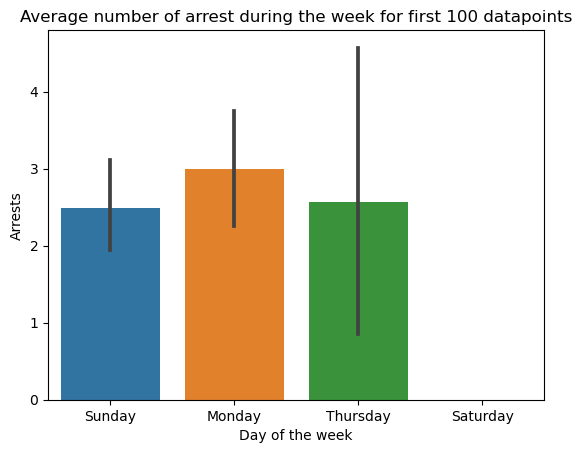

In [34]:
rawheaddf = rawarrest.head(100)
sns.barplot(x='day_of_week', y = 'arrests', data=rawheaddf).set(title='Average number of arrest during the week for first 100 datapoints',ylabel='Arrests', xlabel='Day of the week')

The data for the first chunk of datapoints is evidently sorted on based days of the week and requires reformatting of sorting to account for Saturday in a finalized analysis.
    
Now let's observe a sample of (50) data points and see histogram analysis for total arrests during game/matchday weeks.

<AxesSubplot:title={'center':'Total arrests during game/matchdays'}>

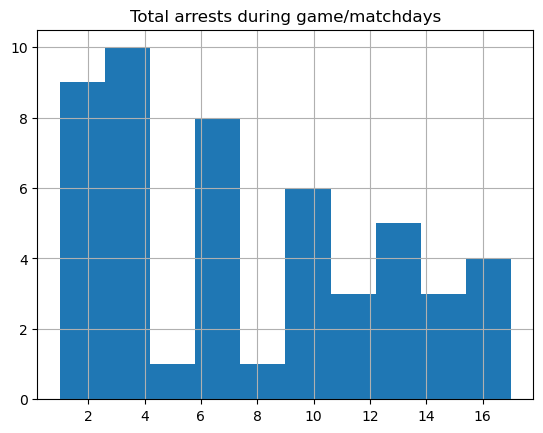

In [35]:
rawsampledf= rawarrest.sample(50)
weektest = rawsampledf['week_num']
plt.title('Total arrests during game/matchdays')
weektest.hist()

This sample from the dataset shows lots of variation with lower arrests within the 4-5 and 11-12 matchday/weeks.
    
What about overall arrests? What if we observe the higher end of arrests (40+arrests) within the dataframe only.

In [36]:
arrestsmax = rawarrest[rawarrest['arrests'].gt(40)]
arrestsmax

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
646,2015,10,Thursday,8:25:00 PM,New York Jets,Buffalo,17,22,NaN,44.0,y
677,2014,14,Sunday,1:25:00 PM,Oakland,San Francisco,24,13,NaN,49.0,n
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
772,2011,12,Sunday,1:15:00 PM,San Diego,Denver,13,16,OT,41.0,y
776,2012,3,Sunday,1:05:00 PM,San Diego,Atlanta,3,27,NaN,47.0,n
777,2012,6,Monday,5:30:00 PM,San Diego,Denver,24,35,NaN,45.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


Interestingly enough, there seems to be a some correlation here at first glance between home teams and higher arrests. 

**BUT** we are looking time and days for this set where there also seems to be higher arrests on NFL Sunday.
  
One more thing I also want to view is the overall histogram data for **ALL** our variables and see what we are working with.

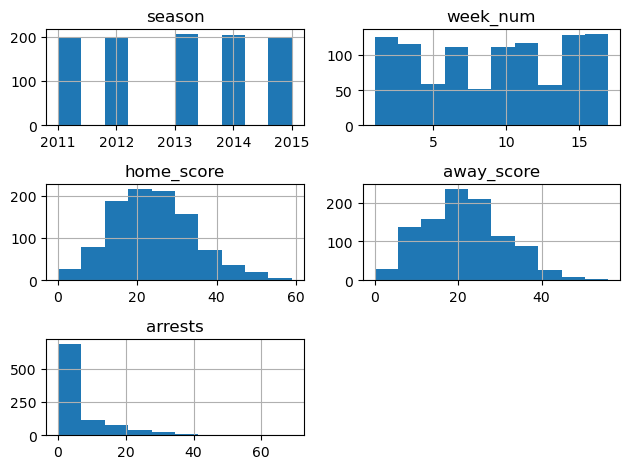

In [56]:
rawarrest.hist()
plt.tight_layout() #Avoid Title overlap

Arrests numbers remain consistent across the years and when looking at the trends on the arrest histogram, the data showcases that 0 arrests is the most common value for NFL games *(Phew!)*
    
Time to clean up or dataframe and since this analysis is looking particularly at the influence of time/day for locale and overall setting, we also need to keep only the essential categorical variables in our cleaned up dataset.

---
## Set up an 'Analysis Pipeline'

Let's load in the original arrests dataset again and keep only the columns we need to analyze our specific metric of groupthink.

Then we can sort the rows based on year/season and the corresponding day of the week. Additionally I also want to rename the columns appropriately for columns.

Once we complete this we can now save the data and implement it into a new dataframe in a processed output file.

In [38]:
#loading dataset
rawarrest = pd.read_csv("..\\data\\raw\\arrests.csv", sep= ",")
    
#Removing columns
formatdf = rawarrest.copy().drop(columns=['home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'division_game'],axis=1).dropna(axis=0)

#Sorting
formatdf.sort_values(by=['season', 'day_of_week'],inplace=True)
    
#Rename columns
formatdf.rename(columns={'day_of_week':'Day of Week','week_num':'Week Number','gametime_local': 'Gametime Local', 
                        'arrests':'Arrests', 'season':'Season'},inplace = True)
#Convert NaN values in arrests to 0
formatdf['Arrests'] = formatdf['Arrests'].fillna(0)

#Save the data in = processed output file
formatdf.to_csv('..\\data\\processed\\SFaheemAnalysisProcess.csv',index=False)

#Now let's quickly observe what our new data looks like
formatdf.head(10)

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0
428,2011,13,Monday,8:30:00 PM,6.0
462,2011,8,Monday,7:30:00 PM,2.0
534,2011,11,Monday,8:30:00 PM,12.0
570,2011,2,Monday,8:30:00 PM,18.0
612,2011,6,Monday,8:30:00 PM,28.0
690,2011,9,Monday,8:30:00 PM,2.0


---
## Method Chaining and writing Python programs

I created two methods for formatting and adjusting our final dataset.

The first method below loads our dataset file as an argument and does 3 things:
1. Drops all unneeded columns for our analysis question
2. Sorts the values by season/year and the day of the week
3. Rename all strings appropriately.

In [39]:
loaddf = (pd.read_csv("..\\data\\raw\\arrests.csv", sep=',')
    .copy().drop(['home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'division_game'],axis=1))
loaddf.sort_values(by=['season', 'day_of_week'],inplace=True)
loaddf.rename(columns={'day_of_week':'Day of Week','week_num':'Week Number','gametime_local': 'Gametime Local', 
                        'arrests':'Arrests', 'season':'Season'},inplace = True)
loaddf.head()

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
264,2011,5,Monday,8:30:00 PM,NaN
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0


#### The second method converts the NaN variables in the arrest category and turns them into 0 integer values:

In [40]:
#Method Chain 2 converting NaN variables to 0 integer values.
finaldf = loaddf
finaldf['Arrests'] = finaldf['Arrests'].fillna(0)
finaldf.head()

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
264,2011,5,Monday,8:30:00 PM,0.0
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0


### The method chain can now be imported as follows:

In [41]:
import project_functions3 as p3
    
projectdf = p3.load_and_process("..\\data\\raw\\arrests.csv")
projectdf.head()

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
264,2011,5,Monday,8:30:00 PM,0.0
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0


---
## Conduct Analysis

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
projectdf = pd.read_csv("..\\data\\processed\\SFaheemAnalysisProcess.csv")


Let's start with insight into what times result in most arrests.
First we will sum the amount of arrests per gametime, removing rows or times where no arrests occur and then plot:

In [43]:
dff2 = projectdf.groupby(["Gametime Local"]).Arrests.sum().reset_index() #Sorts by gametime and sums arrests at each time
dff2 = dff2[dff2['Arrests'] != 0] #remove 0 arrests value for this plot
dff2.head()

,Gametime Local,Arrests
0,12:00:00 PM,247.0
1,1:00:00 PM,1839.0
2,1:02:00 PM,13.0
4,1:05:00 PM,762.0
5,1:06:00 PM,1.0


[Text(0.5, 1.0, 'Total arrests during corresponding gametime'),
 Text(0, 0.5, 'Local time'),
 Text(0.5, 0, 'Arrests')]

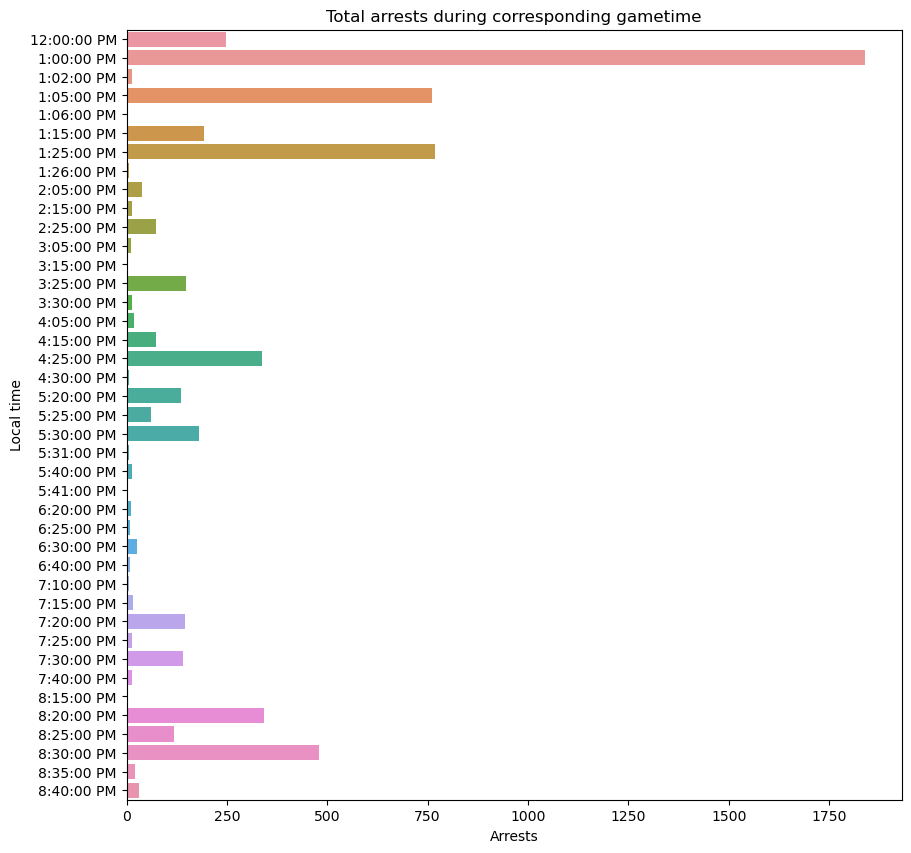

In [44]:
f, ax = plt.subplots(figsize=(10,10)) #Change figure size
sns.barplot(x='Arrests', y = 'Gametime Local', data=dff2).set(title='Total arrests during corresponding gametime',ylabel='Local time', xlabel='Arrests') #PLot barplot

Suprisingly, the most abundant timeframe for arrests is during the afternoon at around (**12:00 - 1:00 pm**.)  
What about average number of arrests at a time?

[Text(0.5, 1.0, 'Average number of arrests at a game during corresponding gametime'),
 Text(0, 0.5, 'Local time'),
 Text(0.5, 0, 'Arrests per game')]

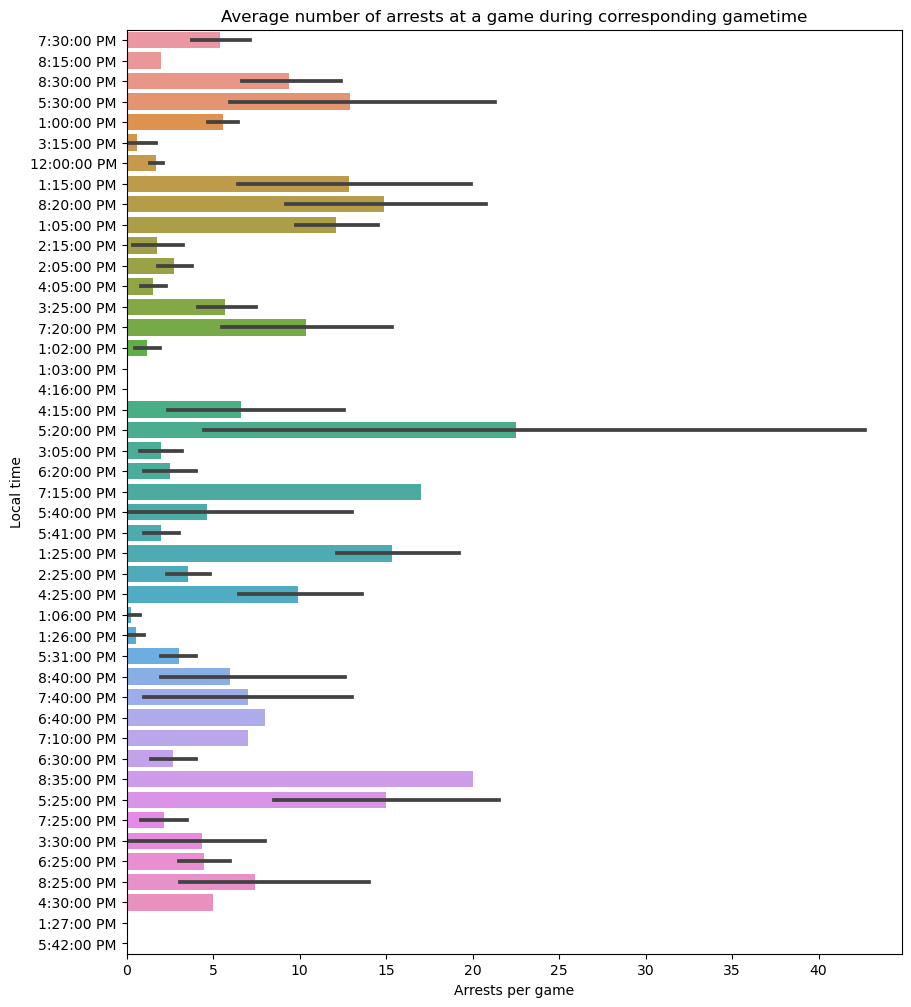

In [45]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(x='Arrests', y = 'Gametime Local', data=projectdf).set(title='Average number of arrests at a game during corresponding gametime',ylabel='Local time', xlabel='Arrests per game') #PLot barplot

Interestingly enough, late night games tend to show the most average arrests per game indicating that perhaps late night crowds are rowdier but afternoon games are more common/popular.

Let's test this theory out by counting the amount of games during specific gametimes.

[Text(0.5, 1.0, 'Number of games at corresponding gametimes'),
 Text(0, 0.5, 'Gametime local'),
 Text(0.5, 0, 'Count of games')]

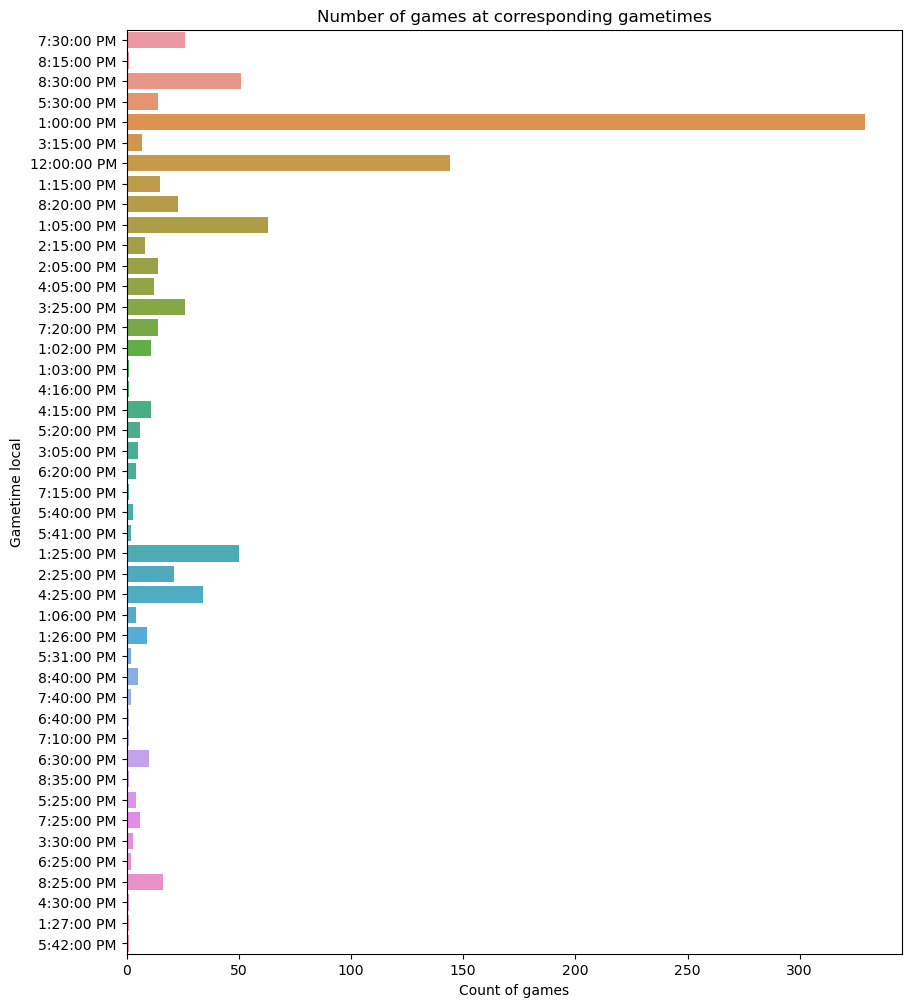

In [46]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(y='Gametime Local', data=projectdf).set(title='Number of games at corresponding gametimes',ylabel='Gametime local', xlabel='Count of games')

Most games do indeed occur at noon from **12:00pm to 1:00pm**!

So we can safely consider late night gametime to have some remarkable correlation with predicting the behavior of crowds.


Let's now look weekdays by similarly observing the amount of games on a day, average number of arrests, and total number of arrests.

In [47]:
dff3 = projectdf.groupby(["Day of Week"]).Arrests.sum().reset_index() #Sorts by day and sums arrests at each time
dff3 = dff3[dff3['Arrests'] != 0] #remove 0 for this plot
dff3.head()

,Day of Week,Arrests
0,Monday,527.0
1,Saturday,90.0
2,Sunday,5217.0
3,Thursday,470.0
4,Wednesday,39.0


[Text(0.5, 1.0, 'Total arrests during corresponding game day'),
 Text(0, 0.5, 'Game day'),
 Text(0.5, 0, 'Arrests')]

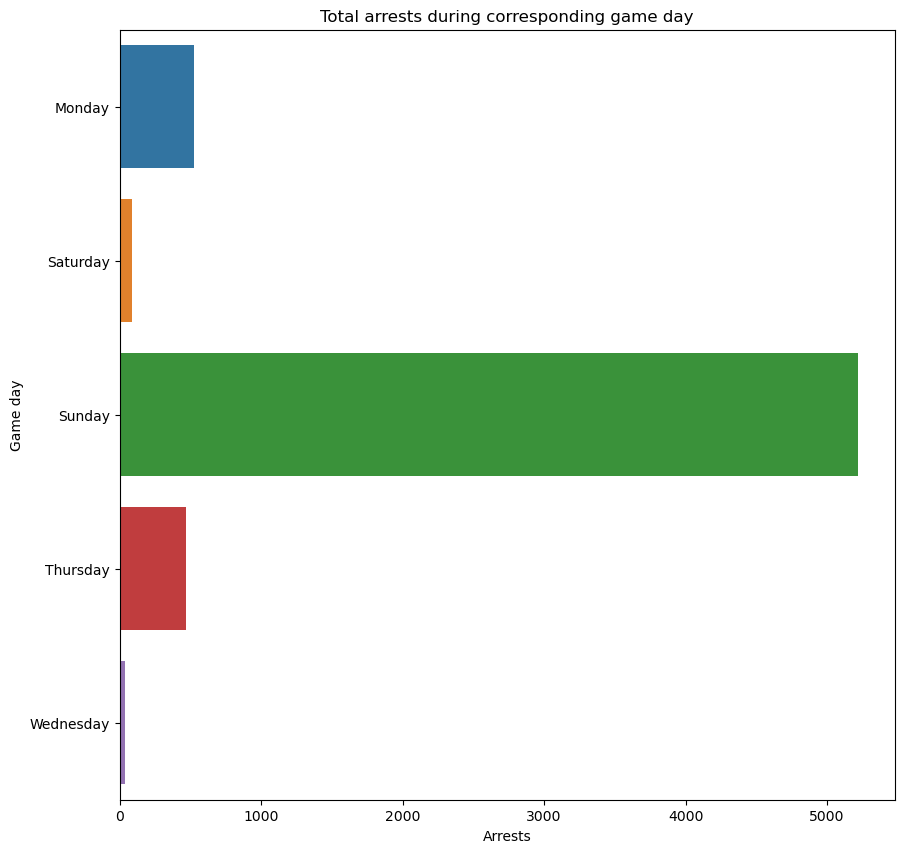

In [48]:
f, ax = plt.subplots(figsize=(10,10)) #Change figure size
sns.barplot(x='Arrests', y = 'Day of Week', data=dff3).set(title='Total arrests during corresponding game day',ylabel='Game day', xlabel='Arrests') #PLot barplot

[Text(0.5, 1.0, 'Average number of arrests at a game during corresponding game day'),
 Text(0, 0.5, 'Game day'),
 Text(0.5, 0, 'Arrests per game')]

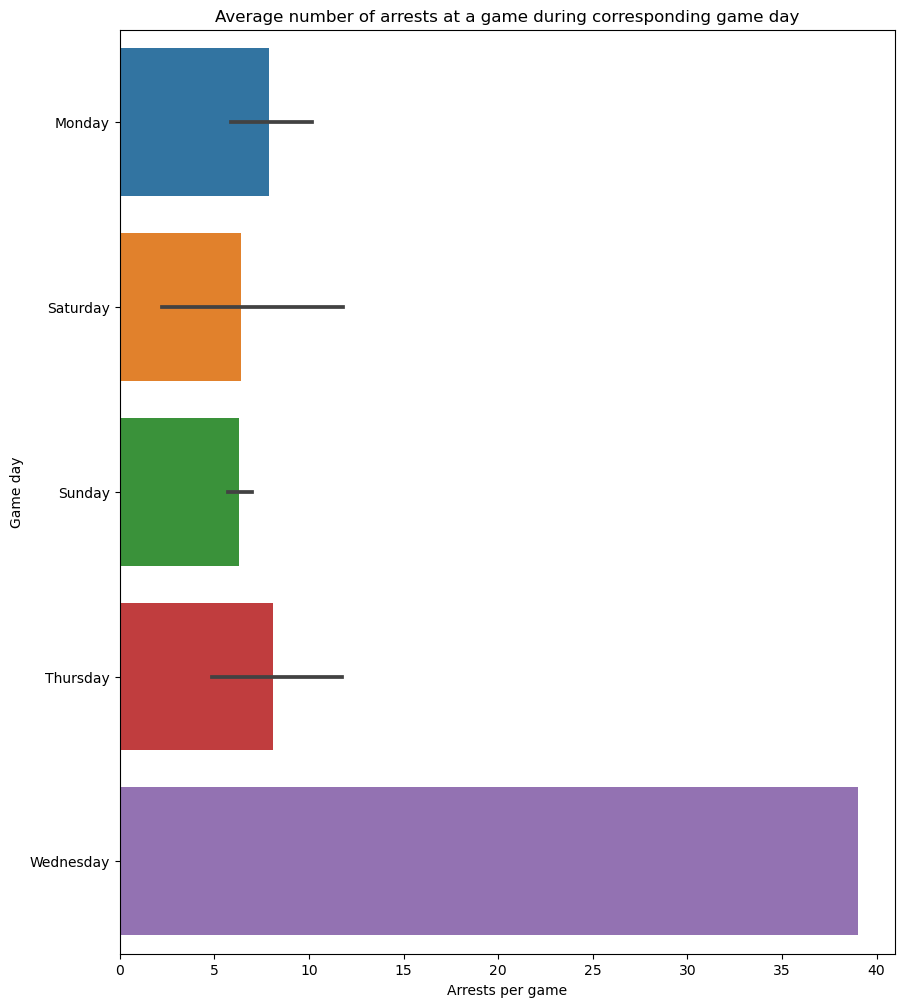

In [49]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(x='Arrests', y = 'Day of Week', data=projectdf).set(title='Average number of arrests at a game during corresponding game day',ylabel='Game day', xlabel='Arrests per game') #PLot barplot

[Text(0.5, 1.0, 'Number of games at corresponding gamedays'),
 Text(0, 0.5, 'Gameday'),
 Text(0.5, 0, 'Count of games')]

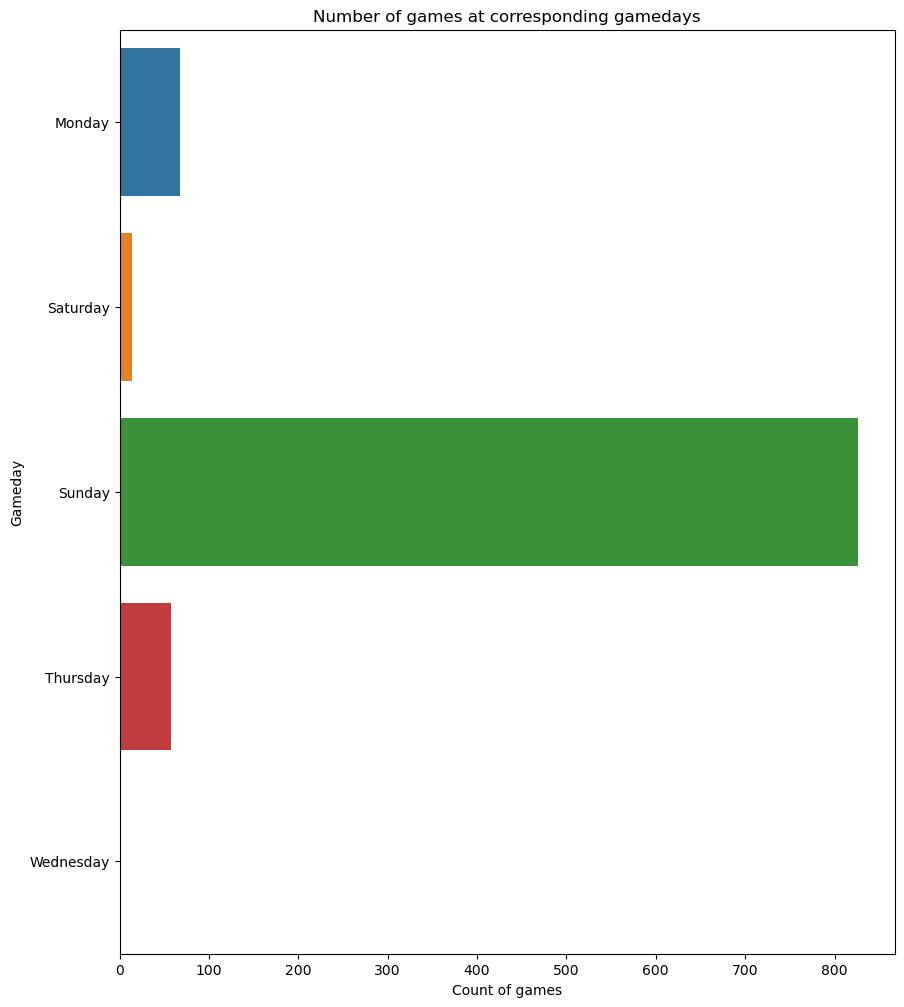

In [50]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(y='Day of Week', data=projectdf).set(title='Number of games at corresponding gamedays',ylabel='Gameday', xlabel='Count of games')

Looking at the table for our data, there is predictably significant amount of games being played on Sunday and therefore, a high amount of total arrests.

**BUT** the average number of arrests per day is significantly higher on Wednesday. **WHY?**...well the answer is simply because only 1 game was played on Wednesday in the dataframe (An intense rivalry game on opening day within the 2012 season). What does that mean for our analysis? Simply put, the magnitude of intensity seen during that game further correlates with the idea of rowdier crowds predictably leading to more arrests.

Excluding the lone Wednesday game however, nother notable metric is that Sunday game do not have the proceeding highest average number of arrests. Rather it is Monday night football that brings in rowdier crowds. Perhaps an indicator of crowd fatigue at the start of of a week.

Finally, why don't we look at the weeks for games and arrests in the same manner.

In [51]:
dff4 = projectdf.groupby(["Week Number"]).Arrests.sum().reset_index() #Sorts by week number of season and sums arrests at each time
dff2 = dff4[dff4['Arrests'] != 0]
dff4.head()

,Week Number,Arrests
0,1,409.0
1,2,414.0
2,3,439.0
3,4,298.0
4,5,349.0


[Text(0.5, 1.0, 'Total arrests during corresponding game week'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Week Number')]

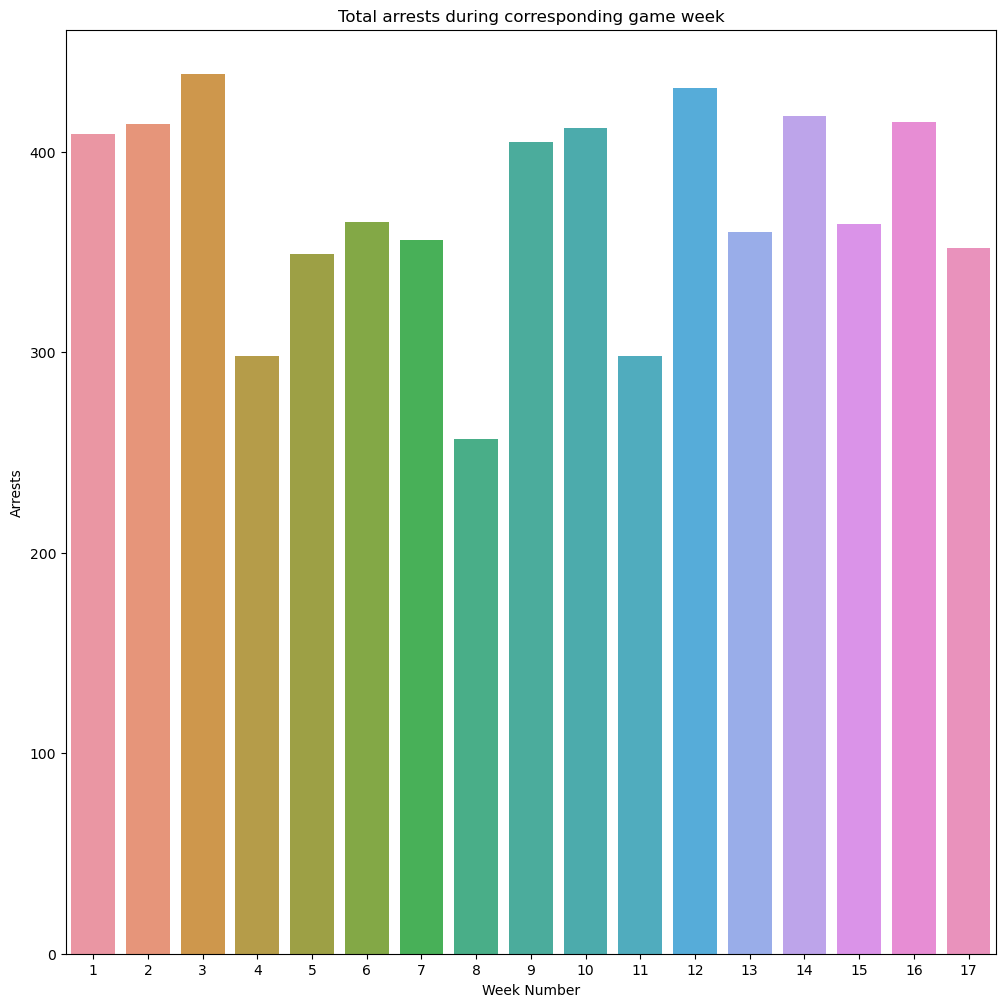

In [52]:
f, ax = plt.subplots(figsize=(12,12)) #Change figure size
sns.barplot(x='Week Number', y = 'Arrests', data=dff4).set(title='Total arrests during corresponding game week',ylabel='Arrests', xlabel='Week Number') #PLot barplot

[Text(0.5, 1.0, 'Average number of arrests at a game during corresponding game week'),
 Text(0, 0.5, 'Average number of arrests'),
 Text(0.5, 0, 'Week Number')]

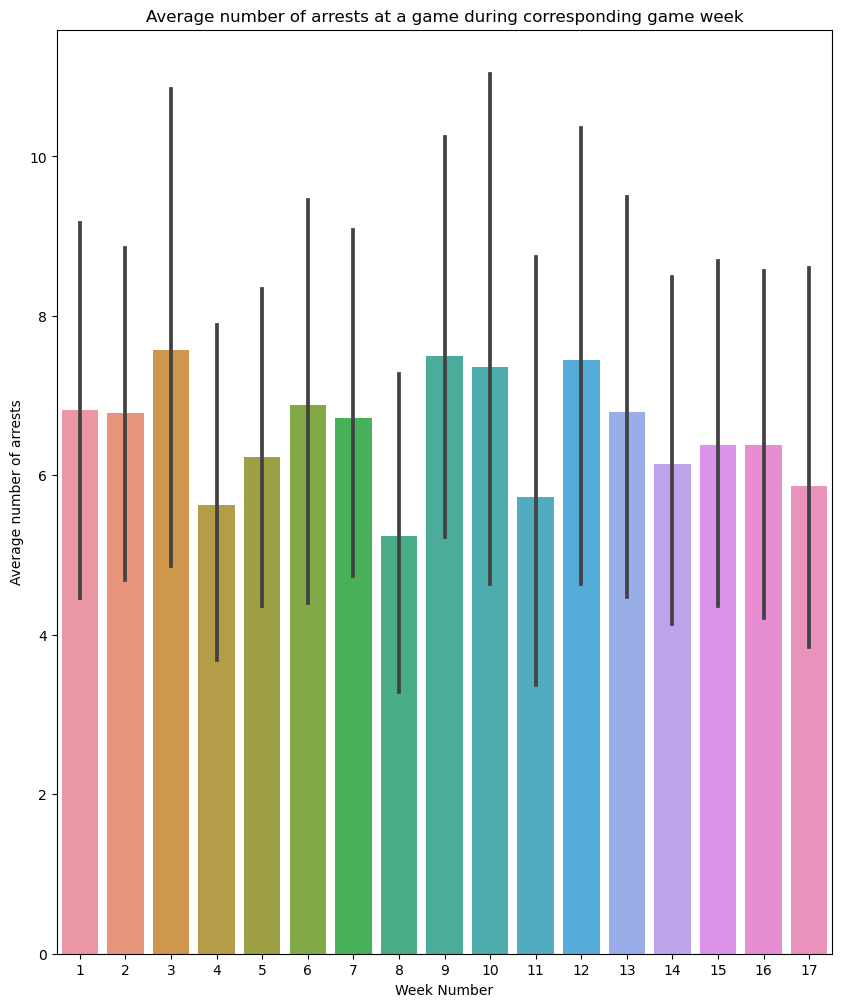

In [53]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(y='Arrests', x = 'Week Number', data=projectdf).set(title='Average number of arrests at a game during corresponding game week',ylabel='Average number of arrests', 
                                                                xlabel='Week Number') #PLot barplot

[Text(0.5, 1.0, 'Number of games at corresponding game week'),
 Text(0, 0.5, 'Total games played during week'),
 Text(0.5, 0, 'Week Number')]

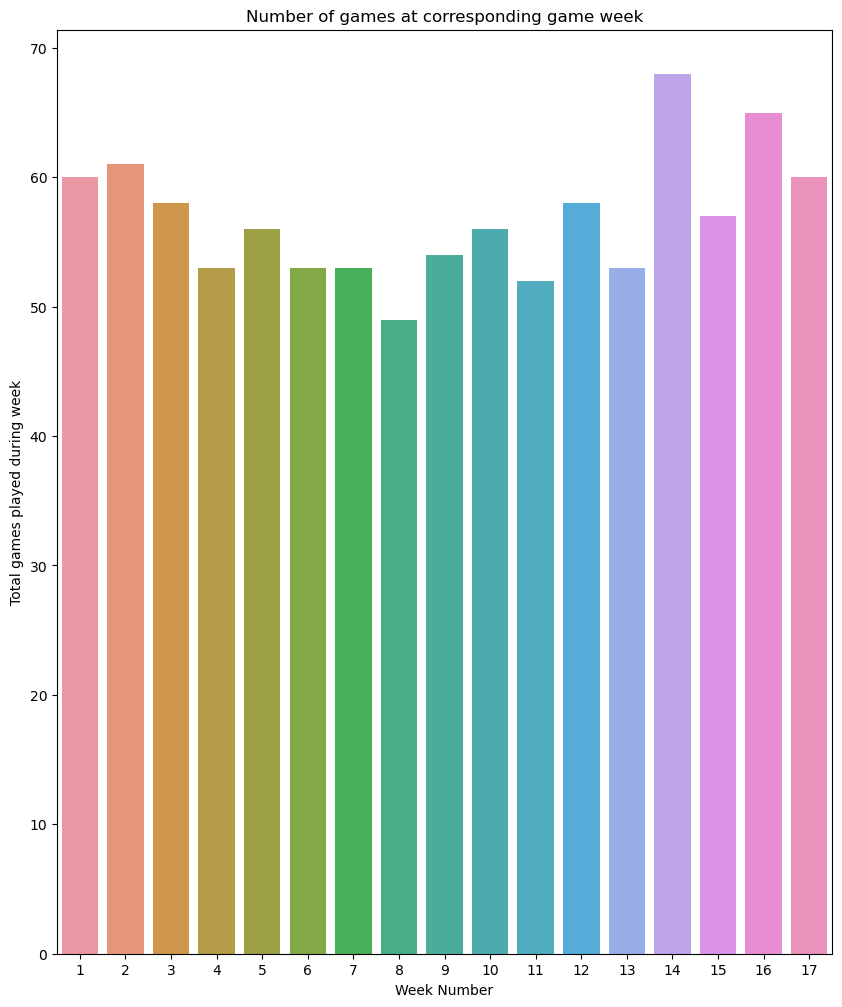

In [54]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(x='Week Number', data=projectdf).set(title='Number of games at corresponding game week',ylabel='Total games played during week', xlabel='Week Number')

When looking at weekly data, most games are scheduled during the final weeks of the season followed by right at the start of the season.
Most arrests however, usually occur arround **Week 2-3** followed by late season weeks whereas the average number of arrests per week vary but are seen to be notably higher right at the start, end, and midpoint of the season. 

*What do these higher arrests within certain timelines tell us?*

According to the [ESPN NFL Schedule](https://www.espn.com/nfl/schedule/_/week/8/year/2022/seasontype/2):
- Week 8-9 is scheduled for around November 1 which is the official trade deadline for the NFL. An important variable in sportsfans' perception of the state of their aligned team.
- Week 14-16 is during the late December holidays season.

So beyond the early week excitement, week number does not seem to have any correlation with arrest rates during NFL games. 

---
## Conclusion

It seems quite clear from the dataset that arrests during NFL in-season games do tend to have correlation with factors pertaining to time. Looking at gametimes, there seems to be a distinct correlation of higher arrests per game for late night games compared to the more popularly schedule mid-day early games. Similarly, arrest rates are higher for Sunday-Monday scheduled NFL games compared to remaining game days. Does this indicate any attribution to the 'groupthink' that we hypothesized at the start of our analysis? 

The game that are played late night are predictably susceptible to crowds that are fatigued and tired in a similar fashion to crowds that may be agitated or distraught at the start and end of the week. These crowds showcase not only the most susceptibility to arrests but also the most total number of arrests. An indicator that individuals often join in when an event of disorder is taking place during the games. This confirms some semblance of 'groupthink' which leads to the higher arrest rates and totals for games. 

#### What about the variation seen in gameweeks? 

The arrest data continues to showcase higher arrests and arrest rates during pivotal game weeks where events, holidays, or sporting decisions are being made. This may not be directly correlating with the time but the date and season are indeed metrics that implicitly distinguish these timelines of high arrests. Indeed within this metric, emotion plays the biggest role in how individuals behave but circumstances surrounding the setting/time/place are influential in creating disorder among larger groups.


Other indicators may be more reliant on specific teams and locations, and other emotionally driven metrics such as overtime, rivalries, and similar constructs of sports. Analysis on these metrics as performed by group members may highlight a bigger picture on the psycological construct behind how fans choose to behave at sporting events.